<a href="https://colab.research.google.com/github/efeecllk/investor-sentiments/blob/main/topic_modeling_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install emoji


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.0 MB/s eta 0:00:00


In [1]:
!pip install datasets scikit-learn pyLDAvis nltk
!pip install --upgrade datasets
!pip install pandas scikit-learn pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [36]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import gensim
from sklearn.linear_model import LogisticRegression
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import string
import re
import emoji

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [31]:
artificial_df = pd.read_csv('/content/drive/MyDrive/NLP/clean_tweet.csv')
real_df = pd.read_csv('/content/drive/MyDrive/NLP/Bitcoin_tweets.csv', nrows=10000)
real_df = real_df[['text']]

df_label_0 = artificial_df[artificial_df['label'] == 0].sample(n=5000, random_state=42)
df_label_1 = artificial_df[artificial_df['label'] == 1].sample(n=5000, random_state=42)
df_label_2 = artificial_df[artificial_df['label'] == 2].sample(n=5000, random_state=42)

artificial_df = pd.concat([df_label_0, df_label_1, df_label_2]).reset_index(drop=True)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Inspect the data
real_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text
0,Blue Ridge Bank shares halted by NYSE after #b...
1,"😎 Today, that's this #Thursday, we will do a ""..."
2,"Guys evening, I have read this article about B..."
3,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...


In [34]:
artificial_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text_v,label
0,financial expert predict steady increase value...,0
1,coin experiencing surge trading volume today c...,0
2,blackrock announces dividend payment dividend ...,0
3,investor urged exercise caution face market fl...,0
4,financial technology fintech rapidly transform...,0


In [37]:
def preprocess_text(text):
    text = emoji.demojize(text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    return text


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
real_df['text'] = real_df['text'].apply(preprocess_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize artificial data
vectorizer_artificial = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_artificial = vectorizer_artificial.fit_transform(artificial_df['text_v'])

# Apply LDA on artificial data
lda_artificial = LatentDirichletAllocation(n_components=5, random_state=42)
lda_artificial.fit(dtm_artificial)

# Extract topics from artificial data
def print_topics(model, vectorizer, top_n=10):
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[f"Topic {idx+1}"] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-top_n:]]
    return topics

artificial_topics = print_topics(lda_artificial, vectorizer_artificial)
print("\nArtificial Data Topics:")
for topic, words in artificial_topics.items():
    print(f"{topic}: {', '.join(words)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Artificial Data Topics:
Topic 1: eth, high, dont, btc, stock, time, rocket, new, market, crypto
Topic 2: expert, analyst, crypto, growth, economic, stock, global, investor, financial, market
Topic 3: news, major, new, latest, share, industry, financial, earnings, company, report
Topic 4: potential, im, trading, portfolio, investor, investing, financial, stock, investment, market
Topic 5: potential, strong, im, tech, analyst, chartincreasing, aapl, bullish, price, stock


In [46]:
# LDA on Real Data

# Vectorize real data
vectorizer_real = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_real = vectorizer_real.fit_transform(real_df['text'])

# Apply LDA on real data
lda_real = LatentDirichletAllocation(n_components=5, random_state=42)
lda_real.fit(dtm_real)

# Extract topics from real data
real_topics = print_topics(lda_real, vectorizer_real)
print("\nReal Data Topics:")
for topic, words in real_topics.items():
    print(f"{topic}: {', '.join(words)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Real Data Topics:
Topic 1: crypto, hour, btcusd, update, ethereum, price, xrp, bitcoin, eth, btc
Topic 2: freebitcoin, binance, bitcoinmining, dogecoin, doge, tesla, crypto, elonmusk, btc, bitcoin
Topic 3: day, free, crypto, price, buy, usd, target, new, btc, bitcoin
Topic 4: igaming, betfuryio, handshake, wi, exciting, experience, platform, follow, bitcoins, let
Topic 5: high, best, hour, cryptocurrency, market, tesla, price, crypto, btc, bitcoin


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


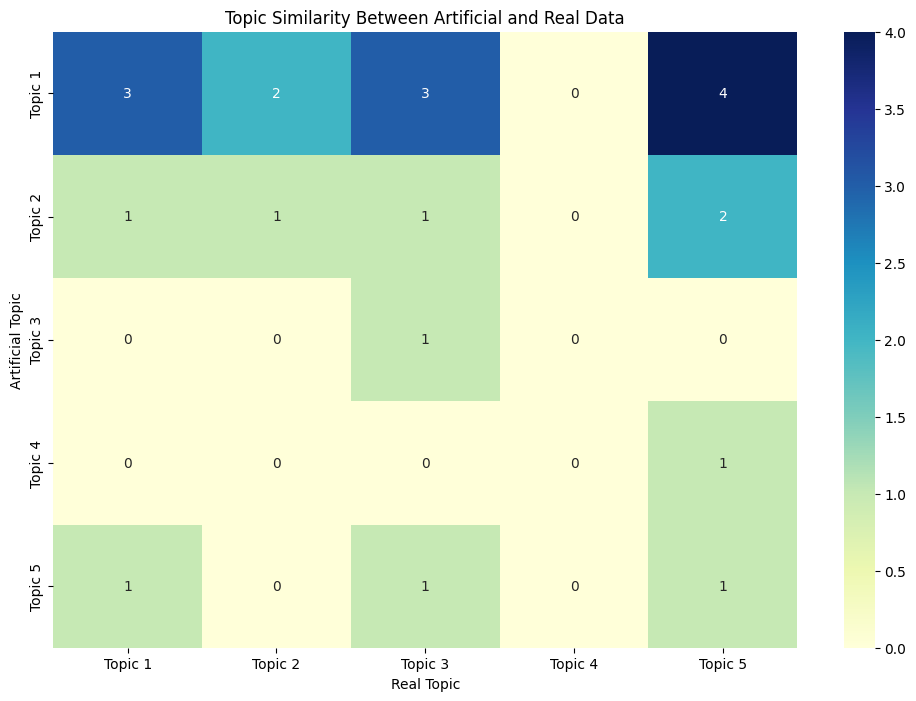

In [49]:
# Compare Artificial and Real Topics

def compare_topics(artificial_topics, real_topics):
    comparison = {}
    for a_topic, a_words in artificial_topics.items():
        for r_topic, r_words in real_topics.items():
            common_words = set(a_words).intersection(set(r_words))
            comparison[(a_topic, r_topic)] = len(common_words)
    return comparison

topic_comparison = compare_topics(artificial_topics, real_topics)

# Display comparison
import seaborn as sns
import matplotlib.pyplot as plt

comparison_df = pd.DataFrame([
    {"Artificial Topic": k[0], "Real Topic": k[1], "Common Words": v}
    for k, v in topic_comparison.items()
])

plt.figure(figsize=(12, 8))
sns.heatmap(
 comparison_df.pivot(index="Artificial Topic", columns="Real Topic", values="Common Words"),
 annot=True, cmap="YlGnBu"
)
plt.title('Topic Similarity Between Artificial and Real Data')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


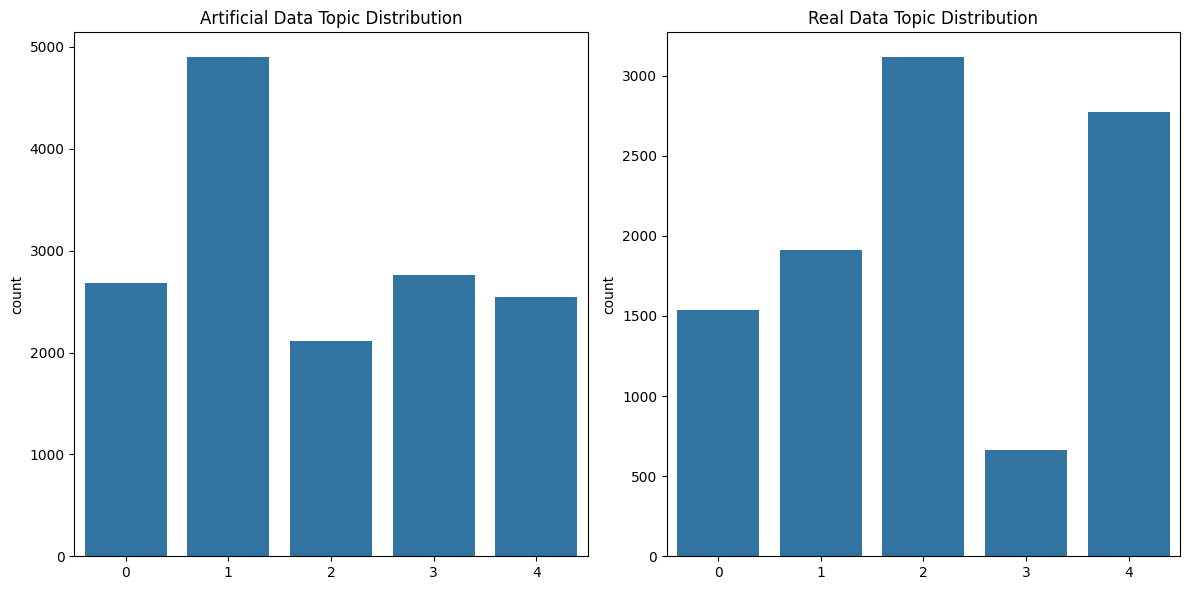

In [50]:
# Cell 5: Visualize Topic Distribution

# Artificial Topic Distribution
artificial_topic_distribution = np.argmax(lda_artificial.transform(dtm_artificial), axis=1)
real_topic_distribution = np.argmax(lda_real.transform(dtm_real), axis=1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=artificial_topic_distribution)
plt.title('Artificial Data Topic Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x=real_topic_distribution)
plt.title('Real Data Topic Distribution')

plt.tight_layout()
plt.show()


In [53]:
# Analyze Topic Differences in a Structured Way

def analyze_topic_differences(artificial_topics, real_topics, top_n=5):
    from IPython.display import display, HTML

    results = []
    for a_topic, a_words in artificial_topics.items():
        for r_topic, r_words in real_topics.items():
            common_words = set(a_words).intersection(set(r_words))
            overlap_percentage = (len(common_words) / top_n) * 100  # Benzerlik yüzdesi

            results.append({
                'Artificial Topic': a_topic,
                'Real Topic': r_topic,
                'Common Words': ', '.join(common_words) if common_words else 'None',
                'Overlap (%)': round(overlap_percentage, 2)
            })

    # Create DataFrame for structured display
    comparison_df = pd.DataFrame(results)
    comparison_df = comparison_df.sort_values(by='Overlap (%)', ascending=False).reset_index(drop=True)

    # Display the results in a styled table
    display(HTML(comparison_df.to_html(index=False)))

    # Highlight key observations
    print("\n🔍 **Key Observations:**")
    top_matches = comparison_df[comparison_df['Overlap (%)'] > 30]  # %30'dan fazla benzerlik olanlar

# Call the function
analyze_topic_differences(artificial_topics, real_topics)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Artificial Topic,Real Topic,Common Words,Overlap (%)
Topic 1,Topic 5,"high, btc, crypto, market",80.0
Topic 1,Topic 1,"eth, btc, crypto",60.0
Topic 1,Topic 3,"new, btc, crypto",60.0
Topic 2,Topic 5,"crypto, market",40.0
Topic 1,Topic 2,"btc, crypto",40.0
Topic 5,Topic 3,price,20.0
Topic 5,Topic 1,price,20.0
Topic 4,Topic 5,market,20.0
Topic 3,Topic 3,new,20.0
Topic 2,Topic 3,crypto,20.0



🔍 **Key Observations:**
